<a href="https://colab.research.google.com/github/DorianD6/NBHV-G4360-Intro-Theory-2021/blob/main/Assignment_4_1%2C_4_2_Dongrui_Deng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NBHV G4360 Introduction to Theoretical Neuroscience**

# **Assignment 4 by Dongrui Deng UNI:dd3001**

## Problem 1: Balanced Amplification

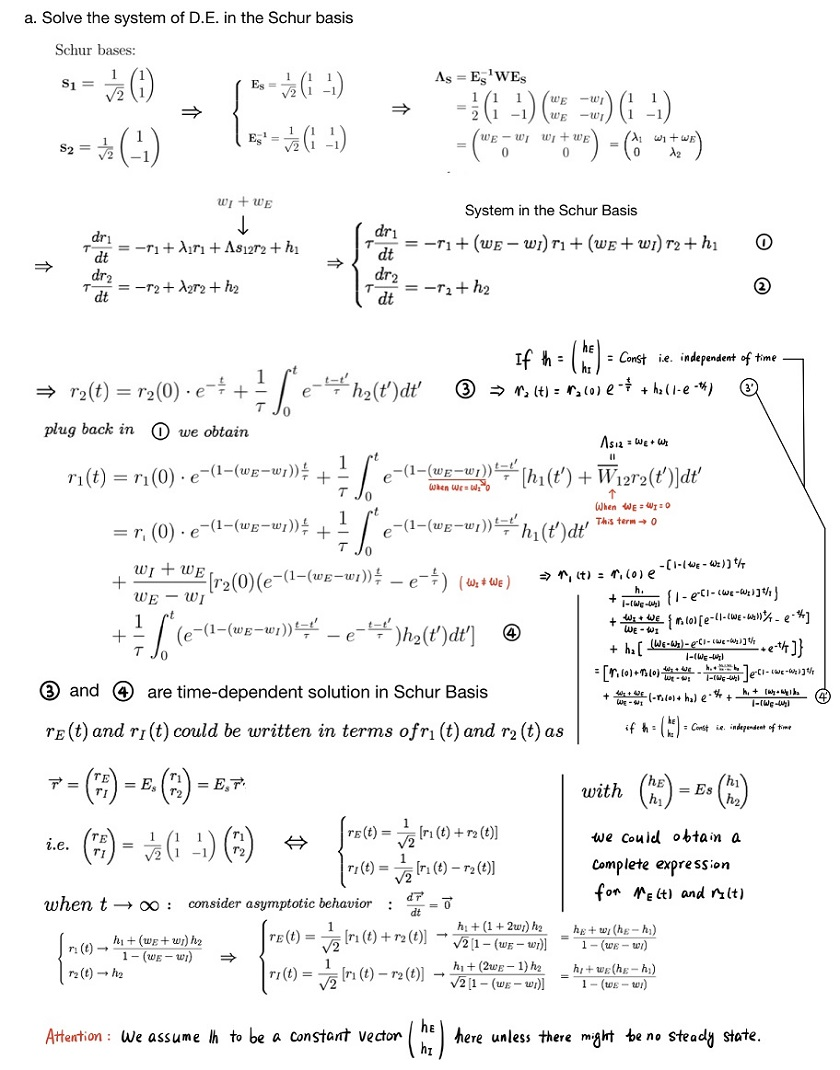

To be more precisely, in order to reach the steady-state for r = $[r_E, r_I]$, we need $h_E$ and $h_I$ in h to be bounded and gets to constant values after sufficiently long time has passed. If h always depend on t, r will not reach a steady state but fluctuate depend on the h(t). 

In this problem, we just simply apply h as a constant vector i.e. $h_E$ and $h_I$ do not change with time. 

In addition, when $w_E = w_I$, the derived equations for rates do not hold and we need other expressions.

#### b. Plot $r_E, r_I, r_1, r_2$ vs. time for $w$

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

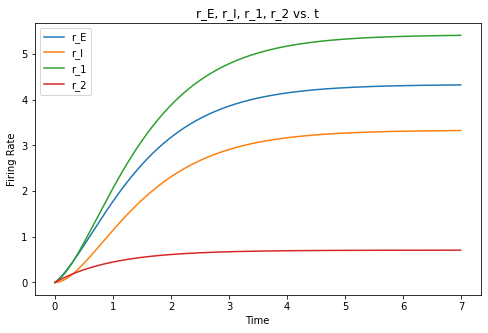

In [ ]:
# Set up known values
w_E = 5
w_I = 1.1 * w_E
r_E = np.zeros(700)
r_I = np.zeros(700)
tau = 1 
h = np.array([1, 0])
# Define E and prepare the remaining data
E_s = np.array([[1, 1], [1, -1]])
E_s = (1/2)**(1/2) * E_s
E_s = np.matrix(E_s)
E_s_inv = E_s.I
r_1 = np.zeros(700)
r_2 = np.zeros(700)
a = E_s_inv @ np.array([r_E[0], r_I[0]])
r_1[0] = a[0, 0]
r_2[0] = a[0, 1]
h_s = E_s_inv @ h
# Calculate r_E, r_I, r_1, r_2 along with time
for i in range(700):
  t = 0.01*i
  r_2[i] = r_2[0]*np.exp(-t/tau) + h_s[0, 1] * (1 - np.exp(-t/tau)) 
  r_1[i] = (r_1[0]+r_2[0]*(w_I + w_E)/(w_E - w_I)-(h_s[0,0]+(w_I + w_E)/(w_E - w_I)*h_s[0,1])/(1-(w_E-w_I)))*np.exp(-(1-(w_E - w_I))*t/tau)
  r_1[i] = r_1[i] + (w_I + w_E)/(w_E - w_I)*(-r_2[0]+h_s[0,1])*np.exp(-t/tau) + (h_s[0,0]+(w_I + w_E)*h_s[0,1])/(1-(w_E-w_I))  
  b = E_s @ [r_1[i], r_2[i]]
  r_E[i] = b[0, 0]
  r_I[i] = b[0, 1]
'''Alternative: use convolution i.e. np.convolve() to determine the value of r_1 and r_2'''
'''See where plotting the time course of r_E(t)/r_E^SS'''
# Plot r_E, r_I, r_1, r_2 vs. t
t = np.arange(0, 7, 0.01)
plt.figure(figsize=(8,5))
plt.plot(t, r_E, label='r_E')
plt.plot(t, r_I, label='r_I')
plt.plot(t, r_1, label='r_1')
plt.plot(t, r_2, label='r_2')
plt.title("r_E, r_I, r_1, r_2 vs. t")
plt.xlabel("Time")
plt.ylabel("Firing Rate")
plt.legend()
plt.show()

###### Compare the result with the plot in Assignment 3

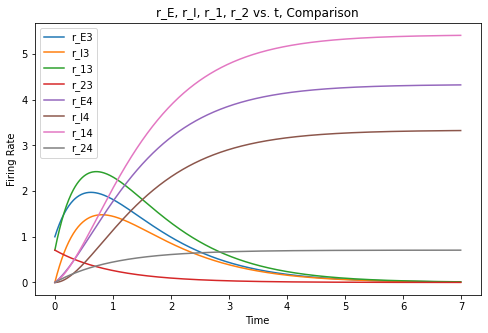

In [ ]:
### COPIED FROM ASSIGNMENT3 ###
# Assuming h = [0, 0], Set up known values
import numpy as np
w_E = 5
w_I = 1.1 * w_E
r_E3 = np.ones(700)
r_I3 = np.zeros(700)
tau = 1
# Define E and prepare the remaining data
E_s = np.array([[1, 1], [1, -1]])
E_s = (1/2)**(1/2) * E_s
E_s = np.matrix(E_s)
E_s_inv = E_s.I
r_13 = np.zeros(700)
r_23 = np.zeros(700)
a = E_s_inv @ np.array([r_E3[0], r_I3[0]])
r_13[0] = a[0, 0]
r_23[0] = a[0, 1]
# Calculate r_E, r_I, r_1, r_2 along with time
for i in range(700):
  t = 0.01*i
  r_23[i] = r_23[0]*np.exp(-t/tau)
  r_13[i] = r_13[0]*np.exp(-(1-(w_E - w_I))*t/tau) + ((w_I + w_E)/(w_E - w_I)) * (r_23[0]*(np.exp(-(1-(w_E - w_I))*t/tau)-np.exp(-t/tau)))
  b = E_s @ [r_13[i], r_23[i]]
  r_E3[i] = b[0, 0]
  r_I3[i] = b[0, 1]
t = np.arange(0, 7, 0.01)
# Plot r_E, r_I, r_1, r_2 vs. t
plt.figure(figsize=(8,5))
plt.plot(t, r_E3, label='r_E3')
plt.plot(t, r_I3, label='r_I3')
plt.plot(t, r_13, label='r_13')
plt.plot(t, r_23, label='r_23')
plt.plot(t, r_E, label='r_E4')
plt.plot(t, r_I, label='r_I4')
plt.plot(t, r_1, label='r_14')
plt.plot(t, r_2, label='r_24')
plt.title("r_E, r_I, r_1, r_2 vs. t, Comparison")
plt.xlabel("Time")
plt.ylabel("Firing Rate")
plt.legend()
plt.show()

The plot here is the response to a steady input while that in HW3 is the impulse response function for each of these of an impulse given to $r_E$.

The response to a steady input at time t after input onset is the integral of the impulse function from 0 to t;

i.e. the response to constant h rises with a speed and amplitutde corresponding to the integral of the impulse response function.

###### Plot for w=0

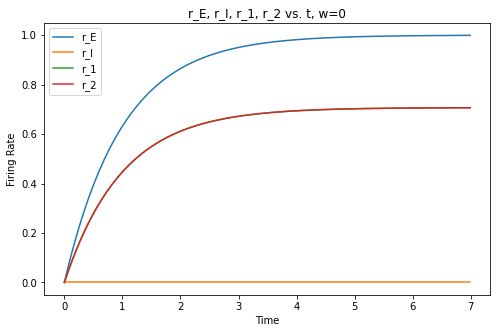

In [ ]:
# Preparation
w_E = 0
w_I = 1.1 * w_E
r_E = np.zeros(700)
r_I = np.zeros(700)
r_1 = np.zeros(700)
r_2 = np.zeros(700)
a = E_s_inv @ np.array([r_E[0], r_I[0]])
r_1[0] = a[0, 0]
r_2[0] = a[0, 1]
# Calculate r_E, r_I, r_1, r_2 along with time
for i in range(700):
  t = 0.01*i
  r_2[i] = r_2[0]*np.exp(-t/tau) + h_s[0, 1] * (1 - np.exp(-t/tau)) 
  r_1[i] = (r_1[0]-h_s[0,0]/(1-(w_E-w_I)))*np.exp(-(1-(w_E - w_I))*t/tau) + h_s[0,0]/(1-(w_E-w_I))
  b = E_s @ [r_1[i], r_2[i]]
  r_E[i] = b[0, 0]
  r_I[i] = b[0, 1]
# Plot r_E, r_I, r_1, r_2 vs. t
t = np.arange(0, 7, 0.01)
plt.figure(figsize=(8,5))
plt.plot(t, r_E, label='r_E')
plt.plot(t, r_I, label='r_I')
plt.plot(t, r_1, label='r_1')
plt.plot(t, r_2, label='r_2')
plt.title("r_E, r_I, r_1, r_2 vs. t, w=0")
plt.xlabel("Time")
plt.ylabel("Firing Rate")
plt.legend()
plt.show()

With $w=0, r_1$ behaves as $r_2$ does as shown above here. 

The difference of the behaviors between $r_1$ and $r_2$ arouses from the effect of connectivity; 

i.e. of the balanced amplification (and also of the nonzero eigenvalue).

#### c. Plot the steady-state value & the time course 

###### Plot the steady-state value vs. w

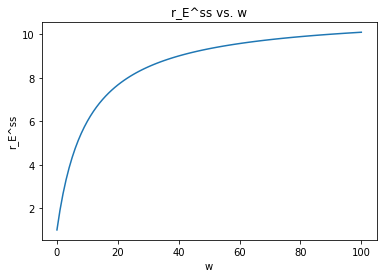

In [ ]:
# Plot the steady-state value of r_E vs. w
w = np.arange(0, 101, 1)
w_E = w
w_I = 1.1 * w
h = [1, 0]
h_E = h[0] * np.ones(101)
h_I = h[1] * np.ones(101)
r_Ess = (h_E + w_I * (h_E - h_I)) / (1 - (w_E - w_I))
plt.figure()
plt.plot(w, r_Ess)
plt.title("r_E^ss vs. w")
plt.xlabel("w")
plt.ylabel("r_E^ss")
plt.show()

###### Plot the time courses of $r(t)/r_E^{SS}$ for w = 0, 5, 25, 100

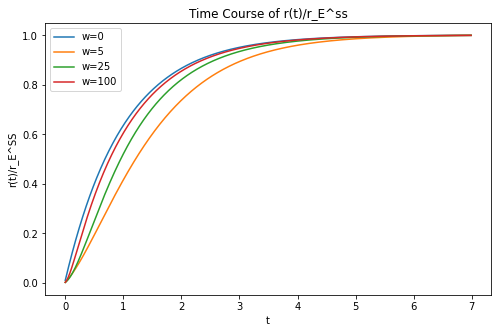

In [ ]:
# Set up known values
w_E = np.array([0, 5, 25, 100])
w_I = 1.1 * w_E
r_E = np.zeros([4, 700])
nr_E = np.zeros([4, 700])
tau = 1
h = np.array([1, 0])
h_s = E_s_inv @ h
# r_Ess = [r_Ess[0], r_Ess[5], r_Ess[25], r_Ess[100]]
# Compute the time course of r(t)/r_E^ss
'''I used convolution i.e. np.convolve(···，···) here'''
for j in range(4):
  r_1 = np.zeros(700)
  r_2 = np.zeros(700)
  r_1[0] = a[0, 0]
  r_2[0] = a[0, 1]
  exp1 = np.zeros(700)
  exp2 = np.zeros(700)
  t = 0.01*np.arange(700)
  exp1 = np.exp(-t/tau)
  exp2 = np.exp(-(1-(w_E[j]-w_I[j]))*(t/tau))
  r_2 = r_2[0]*exp1 + ((1/(100*tau))*np.convolve(exp1,h_s[0,1]*np.ones(700)))[0:700]   
  r_1 = r_1[0]*exp2 + ((1/(100*tau))*np.convolve(exp2,h_s[0,0]*np.ones(700)+(w_E[j]+w_I[j])*r_2))[0:700]    
  b = E_s @ [r_1, r_2]
  r_E[j, :] = b[0, :]
  # nr_E[j, :] = r_E[j, :]/r_Ess[j]
  nr_E[j, :] = r_E[j, :]/r_E[j, 699]
# Plot nr_E, nr_I, nr_1, nr_2 vs. t
t = np.arange(0, 7, 0.01)
plt.figure(figsize=(8,5))
plt.plot(t, nr_E[0], label='w=0')
plt.plot(t, nr_E[1], label='w=5')
plt.plot(t, nr_E[2], label='w=25')
plt.plot(t, nr_E[3], label='w=100')
plt.title("Time Course of r(t)/r_E^ss")
plt.xlabel("t")
plt.ylabel("r(t)/r_E^SS")
plt.legend()
plt.show()

The time courses of the amplified responses indicate that the rising rates of normalized firing rates will decrease along with the increase of w while the cellular time course (the time for w = 0) has the fastest rising. 

#### d. Hebbian Amplification

###### Plot the steady-state values of r_E for w=0 to $w_0$

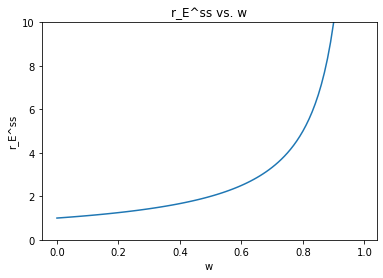

In [ ]:
w = np.arange(0, 1, 0.01)
w_E = w
h = 1
r_Ess = h*np.ones(100) / (np.ones(100) - w)
plt.figure()
plt.plot(w, r_Ess, label='r_E')
plt.title("r_E^ss vs. w")
plt.xlabel("w")
plt.ylabel("r_E^ss")
plt.ylim([0, 10])
plt.show()

###### Plot the impulse response functions for $r_E(0)=1, h = 0$

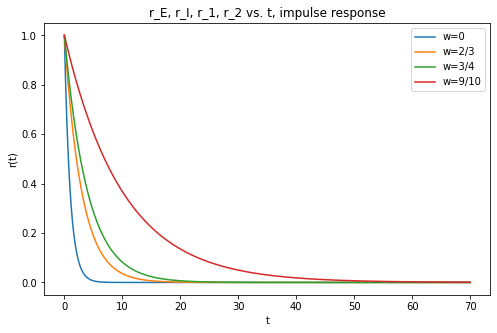

In [ ]:
# Set up known values
w_E = np.array([0, 2/3, 3/4, 9/10])
r_E = np.ones([4, 7000])
tau = 1
h = 0
# Compute the time course of r_E(t)
for j in range(4):
  t = 0.01 * np.arange(7000)
  r_E[j] = r_E[j, 0]*np.exp(-(1-w_E[j])*t/tau) + h/(1-w_E[j])*(1-np.exp(-(1-w_E[j])*t/tau))
# Plot r_E, r_I, r_1, r_2 vs. t
t = np.arange(0, 70, 0.01)
plt.figure(figsize=(8,5))
plt.plot(t, r_E[0], label='w=0')
plt.plot(t, r_E[1], label='w=2/3')
plt.plot(t, r_E[2], label='w=3/4')
plt.plot(t, r_E[3], label='w=9/10')
plt.title("r_E, r_I, r_1, r_2 vs. t, impulse response")
plt.xlabel("t")
plt.ylabel("r(t)")
plt.legend()
plt.show()

###### Plot the impulse response functions for $r_E(0)=0, h = 1$

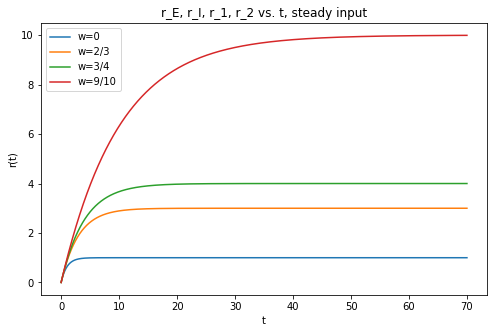

In [ ]:
# Set up known values
w_E = np.array([0, 2/3, 3/4, 9/10])
r_E = np.zeros([4, 7000])
nr_E = np.zeros([4, 7000])
tau = 1
h = 1
# Compute the time course of r_E(t)
for j in range(4):
  t = 0.01 * np.arange(7000)
  r_E[j] = r_E[j, 0]*np.exp(-(1-w_E[j])*t/tau) + h/(1-w_E[j])*(1-np.exp(-(1-w_E[j])*t/tau))
  nr_E[j, :] = r_E[j, :]/r_E[j, 6999]
# Plot r_E, r_I, r_1, r_2 vs. t
t = np.arange(0, 70, 0.01)
plt.figure(figsize=(8,5))
plt.plot(t, r_E[0], label='w=0')
plt.plot(t, r_E[1], label='w=2/3')
plt.plot(t, r_E[2], label='w=3/4')
plt.plot(t, r_E[3], label='w=9/10')
plt.title("r_E, r_I, r_1, r_2 vs. t, steady input")
plt.xlabel("t")
plt.ylabel("r(t)")
plt.legend()
plt.show()

###### Plot the time courses $r(t)/r_E^{SS}$ with $r_E(0)=0, h = 1$

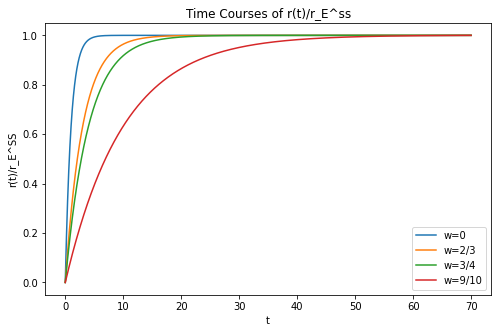

In [ ]:
# Plot nr_E, nr_I, nr_1, nr_2 vs. t
t = np.arange(0, 70, 0.01)
plt.figure(figsize=(8,5))
plt.plot(t, nr_E[0], label='w=0')
plt.plot(t, nr_E[1], label='w=2/3')
plt.plot(t, nr_E[2], label='w=3/4')
plt.plot(t, nr_E[3], label='w=9/10')
plt.title("Time Courses of r(t)/r_E^ss")
plt.xlabel("t")
plt.ylabel("r(t)/r_E^SS")
plt.legend()
plt.show()

The time courses of the amplified responses indicate that the rising rates of normalized firing rates will decrease along with the increase of w (until getting close to 1) while the cellular time course (the time for w = 0) has the fastest rising. This tendency is similar to what we have in part c but the disperse between these normalized courses are more apparent than them we obtained in part c. 

In both cases, the time course of the response to a steady input is the integral of the impulse response function.

## Problem 2: PCA and Factor Analysis

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import multivariate_normal

#### 1. Plot the Data (Cloud of Points)

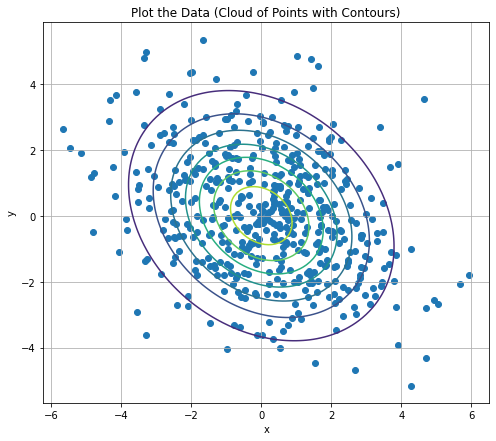

In [ ]:
plt.figure(figsize=(8,7))
Mu = np.array([0, 0])
Sigma0 = np.matrix([[1, 0], [0, 3]])
theta = np.pi/6
RT = np.matrix([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
R = RT.T
Sigma1 = RT@Sigma0@R
Sigma2 = np.matrix([[2, 0], [0, 1]])
Sigma = Sigma1 + Sigma2
xd, yd = np.random.multivariate_normal(Mu, Sigma, 500).T
plt.scatter(xd, yd)
x = np.arange(-5, 5, 0.1) # x coordinates
y = np.arange(-5, 5, 0.1) # y coordinates
xx, yy = np.meshgrid(x, y) # generate a meshgrid
pos=np.dstack((xx, yy)) # 
zz = multivariate_normal(Mu, Sigma) # apply Gaussian-2D
plt.contour(xx, yy, zz.pdf(pos))
plt.title("Plot the Data (Cloud of Points with Contours)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

#### 2. PCA (Principal Component Analysis)
##### 2.1 Form the Covariance Matrix

In [ ]:
N = 500
data = np.array([xd, yd])
xxT_Sum = np.array([[0, 0], [0, 0]])
for i in range (500):
  xxT = np.outer(data[:, i],data[:, i])
  xxT_Sum = xxT_Sum + xxT
Cov = (1 / N) * xxT_Sum
print('Cov =')
print(Cov)
print('Sigma =')
print(Sigma)

Cov =
[[ 3.96662156 -1.12205133]
 [-1.12205133  3.42656681]]
Sigma =
[[ 3.5       -0.8660254]
 [-0.8660254  3.5      ]]


The sampled covariance matrix looks close to $\Sigma_1 + \Sigma_2$ (true covariance matrix), which is a good sign. 

##### 2.2 Find Principal Components

In [ ]:
[w, v] = np.linalg.eig(Cov)
print('Eigenvectors = Principal Components')
print(v)
print("Eigenvalues = Variances")
print(w)

Eigenvectors = Principal Components
[[ 0.78548556  0.61887998]
 [-0.61887998  0.78548556]]
Eigenvalues = Variances
[4.85067996 2.54250841]


1st Principal Component: [0.785, -0.618], Variance = 4.85;

2nd Principal Component: [0.618, 0.785], Variance = 2.54;

All vectors are normalized.

##### 2.3 Draw Vectors on the Plot

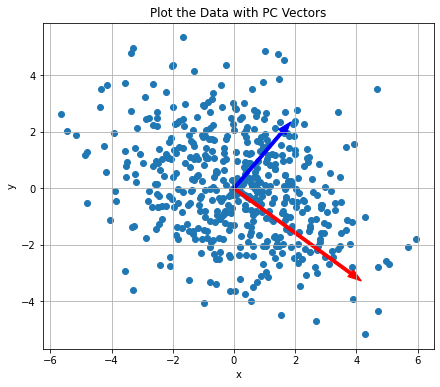

In [ ]:
plt.figure(figsize=(7,6))
plt.scatter(xd, yd)
plt.arrow(0, 0, v[0, 0]*w[0], v[1, 0]*w[0], width=0.1, color='r')
plt.arrow(0, 0, v[0, 1]*w[1], v[1, 1]*w[1], width=0.1, color='b')
origin = np.array([0, 0])
plt.title("Plot the Data with PC Vectors")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

In [ ]:
print("Principal Component Analysis:")
print('Eigenvectors = Principal Components')
print(v)
print("Eigenvalues = Variances")
print(w)
[w, v] = np.linalg.eig(Sigma)
print("For Comparison:")
print('Eigenvectors of the True Cov Matrix')
print(v)
print("Eigenvalues of the True Cov Matrix")
print(w)

Principal Component Analysis:
Eigenvectors = Principal Components
[[ 0.78548556  0.61887998]
 [-0.61887998  0.78548556]]
Eigenvalues = Variances
[4.85067996 2.54250841]
For Comparison:
Eigenvectors of the True Cov Matrix
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
Eigenvalues of the True Cov Matrix
[4.3660254 2.6339746]


They give a good description of my data as the principal components are close to the eigenvectors of $Σ_1 + Σ_2$.

#### 3. Factor Analysis

In [ ]:
from sklearn.decomposition import FactorAnalysis
transformer = FactorAnalysis(n_components = 1)
fa_fit1 = transformer.fit(data.T)
transformer = FactorAnalysis(n_components = 2)
fa_fit2 = transformer.fit(data.T)

In [ ]:
print('One Factor')
print(fa_fit1.components_)
print('Covarience Matrix')
print(fa_fit1.get_covariance())
print('Two Factors')
print(fa_fit2.components_)
print('Covarience Matrix')
print(fa_fit2.get_covariance())

One Factor
[[-1.46826652  0.76949091]]
Covarience Matrix
[[ 3.95180752 -1.12981775]
 [-1.12981775  3.41904138]]
Two Factors
[[ 1.53688283 -1.21854211]
 [ 0.76833593  0.96906154]]
Covarience Matrix
[[ 3.95234894 -1.12819165]
 [-1.12819165  3.42392515]]


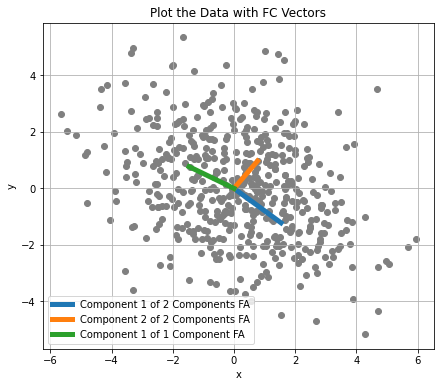

In [ ]:
plt.figure(figsize=(7,6))
plt.scatter(data[0], data[1], color='gray')
plt.plot(np.asarray([0, fa_fit2.components_[0,0]]), np.asarray([0, fa_fit2.components_[0,1]]), label = "Component 1 of 2 Components FA", lw=5)
plt.plot(np.asarray([0, fa_fit2.components_[1,0]]), np.asarray([0, fa_fit2.components_[1,1]]), label = "Component 2 of 2 Components FA", lw=5)
plt.plot(np.asarray([0, fa_fit1.components_[0,0]]), np.asarray([0, fa_fit1.components_[0,1]]), label = "Component 1 of 1 Component FA", lw=5)
plt.title("Plot the Data with FC Vectors")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.legend()
plt.show()